<a href="https://colab.research.google.com/github/MuhammadHatta72/pcvk-semester5/blob/main/meet5/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Nama Kelompok:
##### 1. Dandy Wahyu Syahputra (2141720002)
##### 2. Muhammad Hatta (2141720021)
##### 3. Sabbaha Naufal Erwanda (2141720221)
##### kelas: TI-3A

### Persiapan

In [1]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Buat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


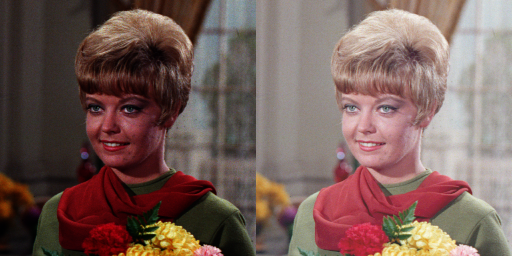

In [4]:
def adjust_gamma(image, gamma):
    # build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype('uint8')

    # apply gamma correction using the lookup table
    return cv.LUT(image, table)

# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/Meet 3/female.tiff')

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

# Apply gamma correction to the image
corrected_img = adjust_gamma(img, gamma)

# Display the original and corrected images
final_frame = cv.hconcat((img, corrected_img))
cv2_imshow(final_frame)
# cv.imshow("Original Image", img)
# cv.imshow("Corrected Image", corrected_img)
# cv.waitKey(0)

## 2. Buat Simulasi Image Depth

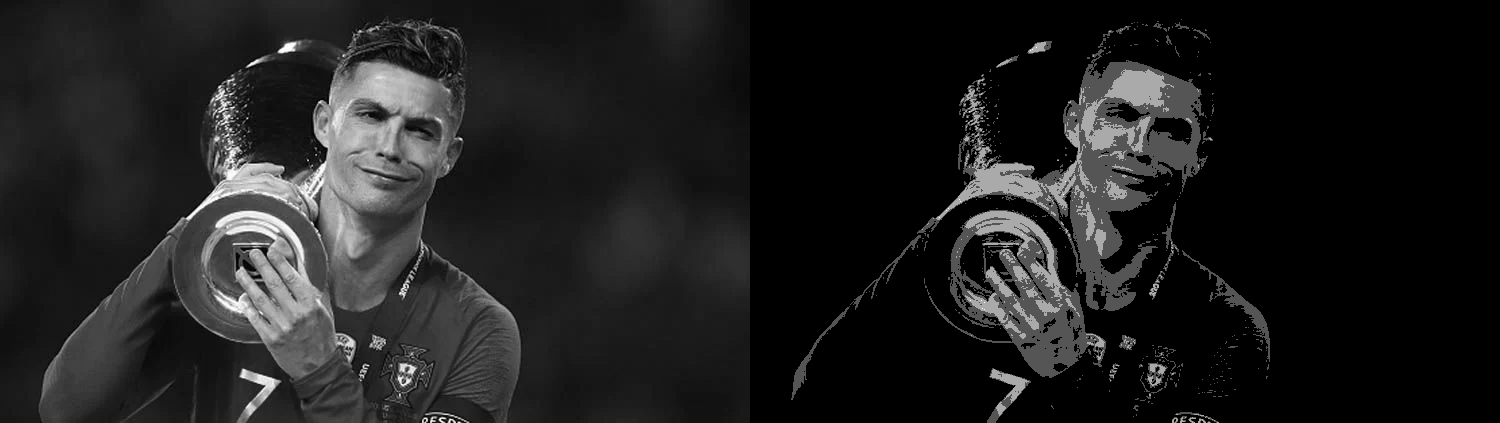

In [5]:
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Load the image
original = cv.imread('/content/drive/MyDrive/PCVK/Meet 5/cr7.jpg', cv.IMREAD_GRAYSCALE)

# Create a depth image with bit depth 2
depth_image = np.zeros(original.shape, original.dtype)
# depth_image = np.zeros(original.shape, original.dtype)

# Calculate the depth of each pixel in the image
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i][j] = int(original[i][j] / level) * level

# Display the original and depth images
final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)
# cv.imshow("Original Image", original)
# cv.imshow("Depth Image", depth_image)
# cv.waitKey(0)

## 3. Buat modul Average Denoising

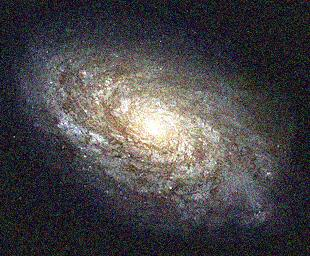

In [11]:
import glob

# Load the image
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Meet 5/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Apply average denoising to the image
dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

# Display the original and denoised images
# cv.imshow("Original Image", cv_img[0])
# cv.imshow("Denoised Image", dst)
# cv.waitKey(0)

In [12]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.347651728426307


In [13]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/Meet 5/galaxy.jpeg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Meet 5/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

Nilai PSNR adalah 27.531333086388354 (dB)


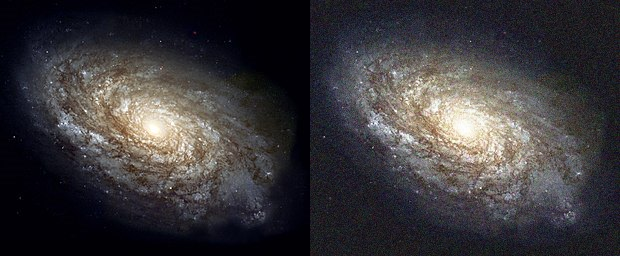

In [14]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.529113234049674 (dB)


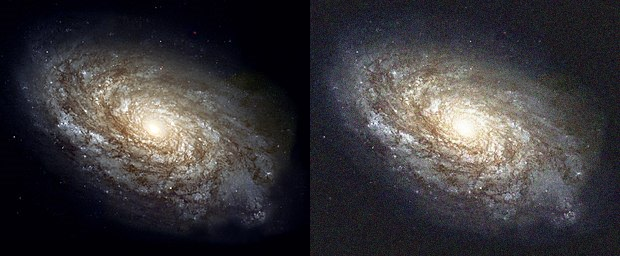

In [15]:
# Memakai jumlah average 5
dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.518401340036455 (dB)


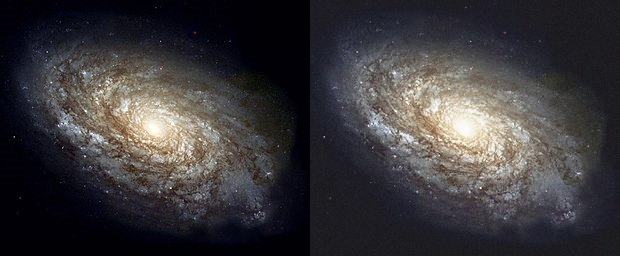

In [16]:
# Memakai jumlah average 30
dst = cv_img[0]
noise_number = 30
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.501900699011422 (dB)


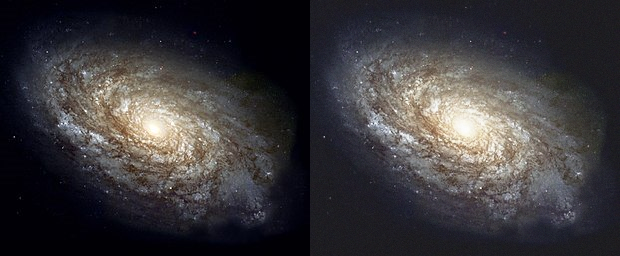

In [17]:
# Memakai jumlah average 60
dst = cv_img[0]
noise_number = 60
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.52175171690527 (dB)


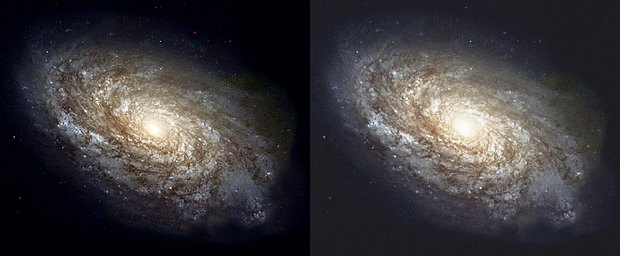

In [18]:
# Memakai jumlah average 80
dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.523094177645277 (dB)


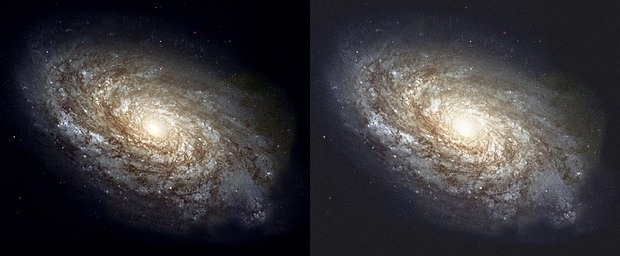

In [19]:
# Memakai jumlah average 100
dst = cv_img[0]
noise_number = 100
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

## 4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff)

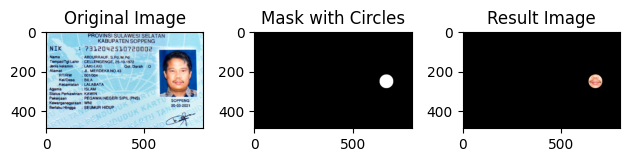

In [21]:
#Kelompok 5

img = cv.imread('/content/drive/MyDrive/PCVK/Meet 3/KTP.jpeg')

mask = np.zeros_like(img)

center_coordinates1 = (670, 250)
radius1 = 35
color = (255, 255, 255)
thickness = -1
cv.circle(mask, center_coordinates1, radius1, color, thickness)

# center_coordinates2 = (725, 192)
# radius2 = 30
# cv.circle(mask, center_coordinates2, radius2, color, thickness)

result = cv.bitwise_and(img, mask)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('Result Image')

plt.tight_layout()
plt.show()

##5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.

###NOT

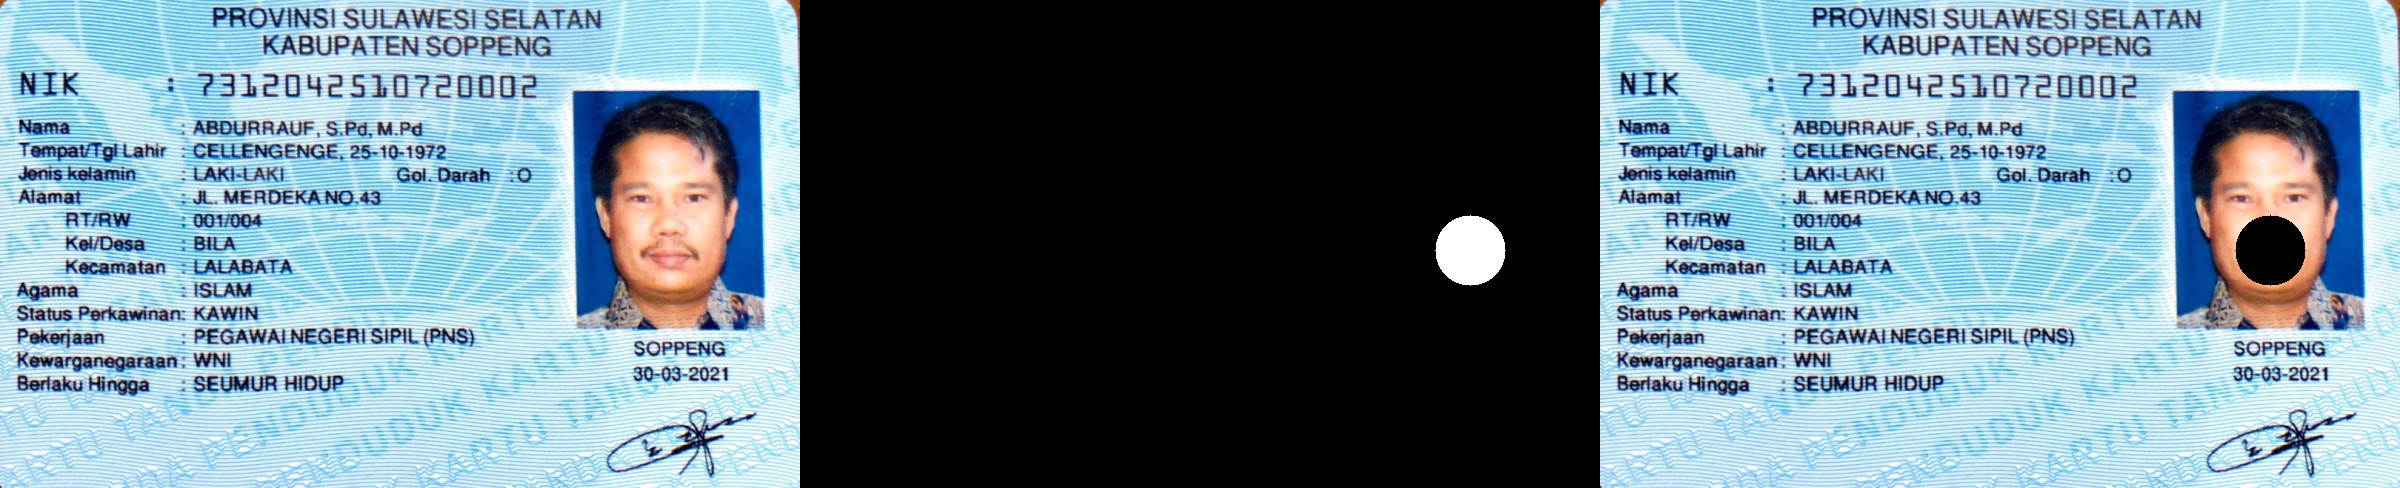

In [22]:
not_mask = cv.bitwise_not(mask)

# Apply the NOT masks to the original image using the bitwise AND operator
result_not = cv.bitwise_and(img , not_mask)

cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.cvtColor(mask, cv.COLOR_BGR2RGB)
cv.cvtColor(result_not, cv.COLOR_BGR2RGB)

# Concatenate the original image and result images
not_image = cv.hconcat([img, mask, result_not])

# Display image
cv2_imshow(not_image)
cv.waitKey(0)
cv.destroyAllWindows()

###OR

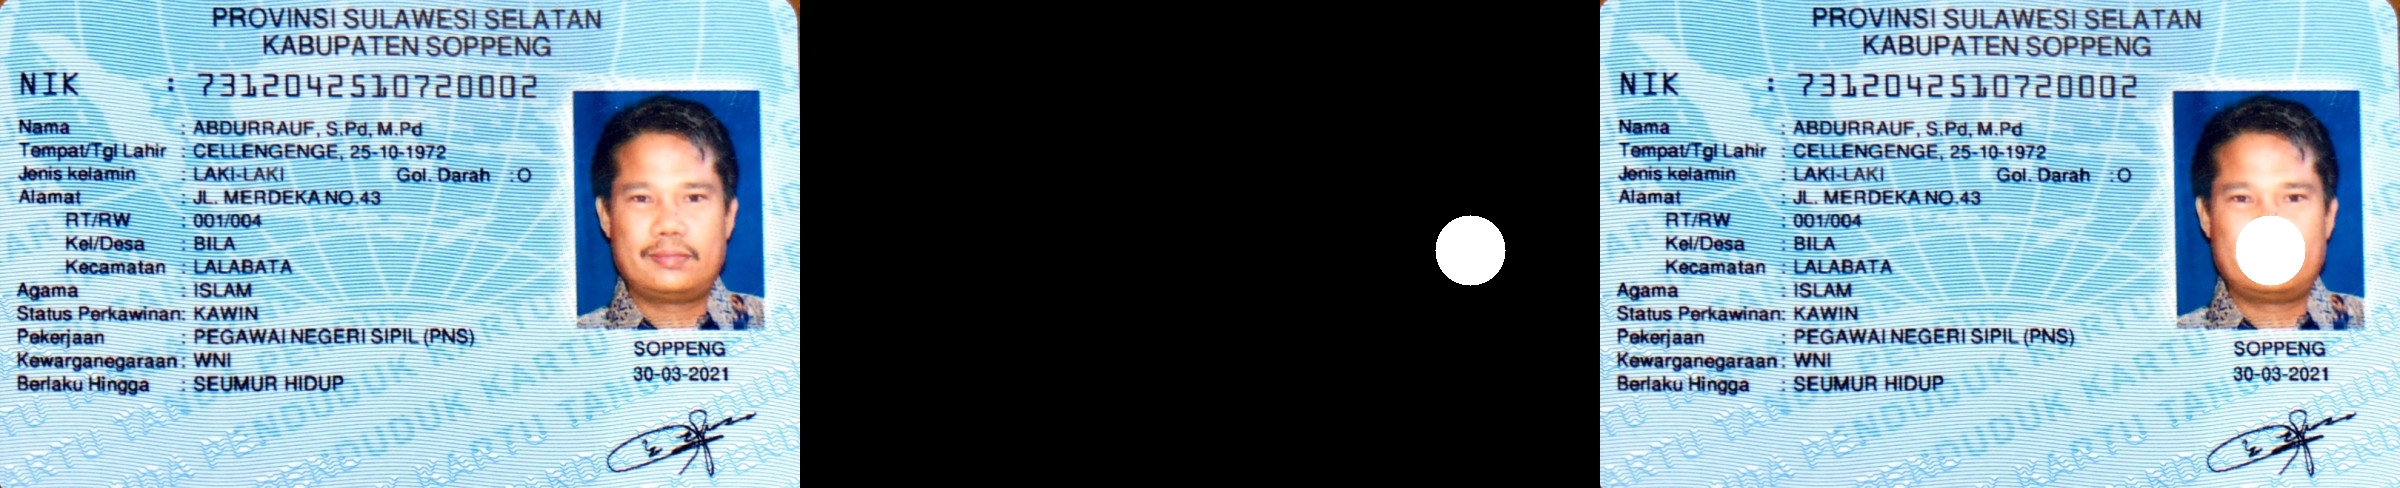

In [23]:
# Combine the masks using the bitwise OR operator
combine_or = cv.bitwise_or(img, mask)

# Apply the combined mask using the bitwise OR operator
result_or = cv.bitwise_or(img, combine_or)

cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.cvtColor(mask, cv.COLOR_BGR2RGB)
cv.cvtColor(result_or, cv.COLOR_BGR2RGB)

# Concatenate the original image and result image horizontally
or_image = cv.hconcat([img, mask, result_or])

# Display the concatenated image
cv2_imshow(or_image)
cv.waitKey(0)
cv.destroyAllWindows()

###NAND

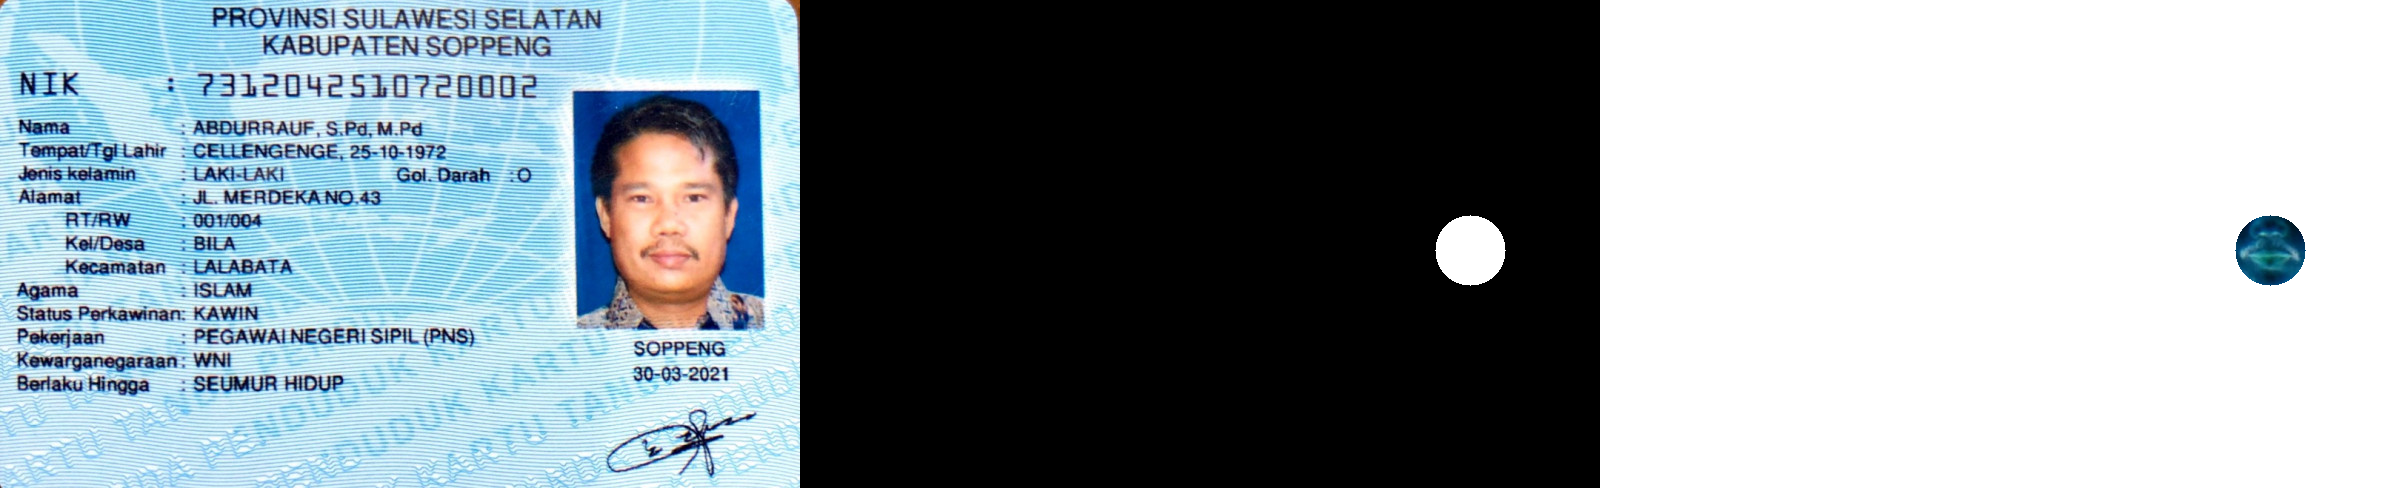

In [24]:
# Perform the NAND operation on the masks
nand_mask = cv.bitwise_not(cv.bitwise_and(img, mask))

# Concatenate the original image and result image
nand_image = cv.hconcat([img, mask, nand_mask])

# Display image
cv2_imshow(nand_image)
cv.waitKey(0)
cv.destroyAllWindows()

###XOR

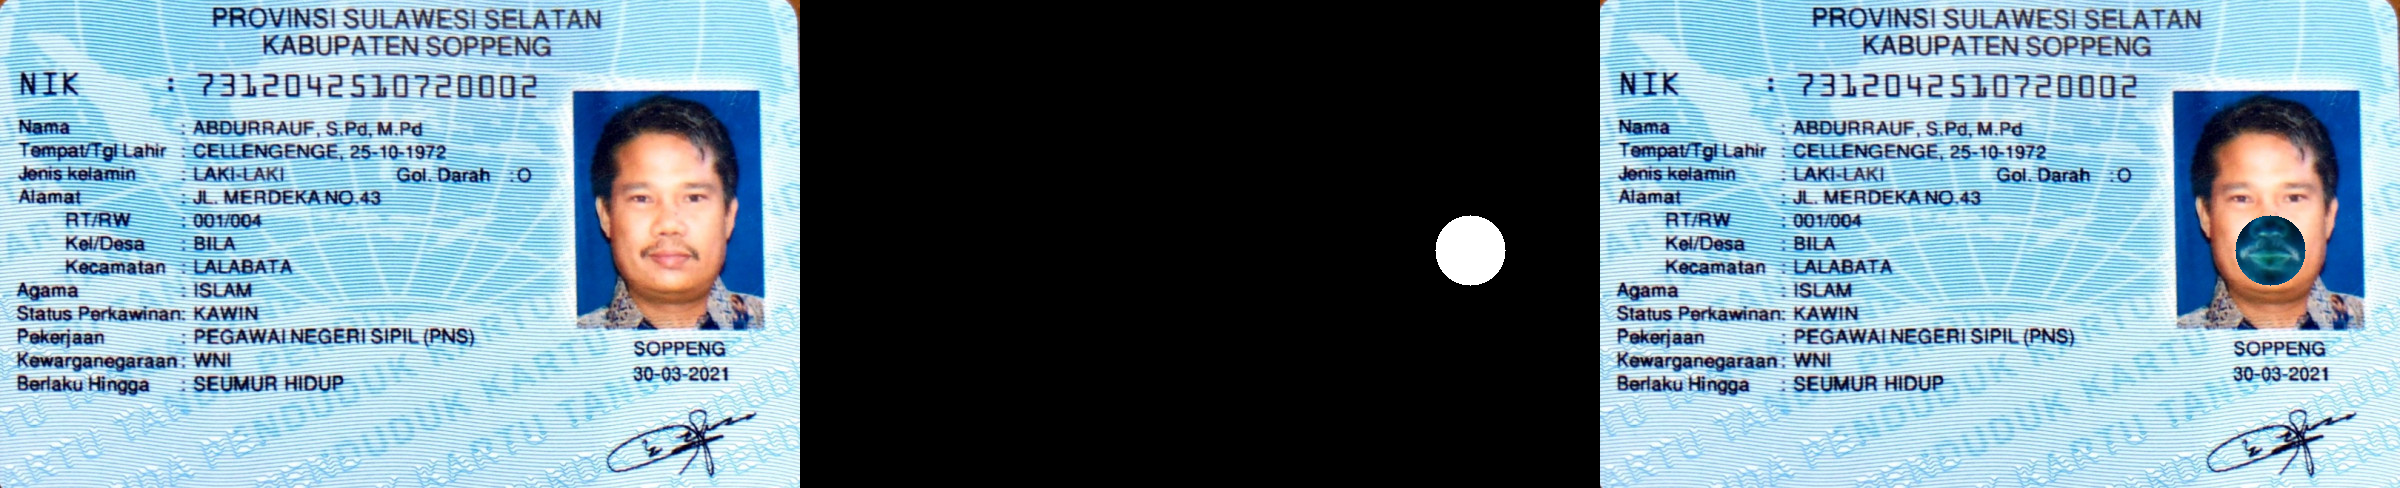

In [25]:
# Apply the XOR mask to the original image using the bitwise XOR operator
result_xor = cv.bitwise_xor(img, mask)

# Concatenate the original image and result image
xor_image = cv.hconcat([img, mask, result_xor])

# Display image
cv2_imshow(xor_image)
cv.waitKey(0)
cv.destroyAllWindows()